# Investigation of Brown's Rest-frame Templates
this code is intended to be used to explore brown's rest-frame templates. These templates are intended to be used only to experiment with the process of combining seds and are not intended to be used to represent the final sed data as we need to potentially construct the correct galaxy seds by using correct SFHs,etc. In addition to the templates used correspond to the right galaxy type. This can be found in Brown's 2014 paper. 

Rest frame galaxies used in this code will be plotted on UVJ colour space as an experiment and will then be combined with AGN to form composites which will then again be plotted on UVJ colour space

In [109]:
# Import all of the relevant libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits


In [110]:
# In this code we are aiming to investigate brown's templates, to do this we devise a code to read 
# in all of the templates into the workspace and then plot them to see what they look like.
# as they are galaxies names we will have to read in the names in the folder as an array
# then we will have to read in the fits files and plot them.

# First we will read in the names of the files in the folder
# This is done using the os library


# Create a function to read in brown's templates


def read_brown_templates():
    df_list = []
    objname_list = []
    folder_path = os.path.join('datasets', 'Templates','Brown', '2014','Rest')
    files_in_folder = os.listdir(folder_path)
    for file in files_in_folder:
        # Find filepath
        objname = file.split('_restframe.dat')[0]
        filepath = os.path.join(folder_path, file)
        data = np.loadtxt(filepath)
        #convert to dataframe 
        df = pd.DataFrame(data)
        df_list.append(df)
        objname_list.append(objname)
    return df_list, objname_list


# Create a function to plot a random galaxy from brown's templates, must be used with 
def plot_galaxy(df_list, objname_list, n, israndom = True):
    if israndom:
        n =np.random.randint(0, 128)
    

    # plot a single galaxy
    df = df_list[n]
    obj_name = objname_list[n]
    
    plt.figure(figsize=(10, 5))
    plt.plot(df[0], df[2])
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
    plt.title('Galaxy Template of: '+str(obj_name))
    plt.grid()
    plt.xscale('log')
    plt.show()
    
    

    

In [111]:
df_list, objname_list = read_brown_templates()


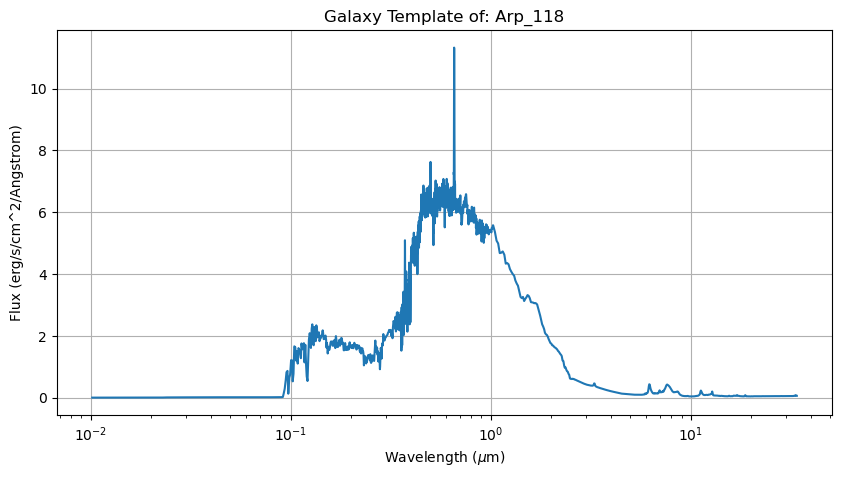

In [112]:
# Run the plotting code 20 times
for i in range(1):
    plot_galaxy(df_list, objname_list, i, israndom = False)
    
    
 # plot the galaxies
 





# Convert each of the templates
using the photometric filters (2Mass, Johnson) to determine the UVJ colours of these objects. We can then plot these colours on a UVJ diagram. This is similar to what was done with the previous brown templates, however these templates are given in rest frame colours from the start.

In [113]:
# We begin by reading in the names of the passband filters. 
# Similarly we can also read in the passbands for the UVJ colours
pb_U = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

# use the astSED library to read in the passbands, ultimaly we want to normalise the passbands, and use these to generate UVJ colours.
pb_U = astSED.Passband(pb_U, normalise=False)
pb_V = astSED.Passband(pb_V, normalise=False)
pb_J = astSED.Passband(pb_J, normalise=False)

In [114]:
# We now want to calculate the UVJ colours for the galaxies
# recalling that our SEDs are in the df_list array
# we will use the astSED library to calculate the UVJ colours
n= 4
wl = df_list[n][0] * 10000 # this makes it angstroms - this conversion must be done!
fl = df_list[n][2]

a = fl[fl <= 0]
b = wl[wl <= 0]

print(a)
print(b)

wl # in microns

Series([], Name: 2, dtype: float64)
Series([], Name: 0, dtype: float64)


0          102.01
1          103.91
2          106.08
3          108.05
4          110.06
          ...    
2357    332681.97
2358    334324.16
2359    335966.37
2360    337608.72
2361    339250.91
Name: 0, Length: 2362, dtype: float64

In [115]:




# create an SED object containing the SED of the galaxy
# in addition to this use the relevant wavelength and flux
sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs


sed.asList()




[[102.01, 1.733213e-14],
 [103.91, 2.712969e-14],
 [106.08, 4.317142e-14],
 [108.05, 6.963754e-14],
 [110.06, 1.269054e-13],
 [113.93, 2.804301e-13],
 [117.94000000000001, 5.650819e-13],
 [120.96000000000001, 3.059319e-12],
 [124.92, 5.545501e-12],
 [126.95, 7.155468e-12],
 [128.13, 8.2678e-12],
 [131.10999999999999, 1.177424e-11],
 [132.02, 1.519574e-11],
 [133.86, 1.889916e-11],
 [136.98, 3.060833e-11],
 [139.84, 4.182338e-11],
 [143.1, 1.435033e-10],
 [147.11, 4.327138e-10],
 [150.88, 6.145772e-10],
 [155.11, 8.666462e-10],
 [159.09, 1.216562e-09],
 [162.05, 1.540352e-09],
 [165.82, 2.118219e-09],
 [170.07999999999998, 2.826407e-09],
 [172.84, 3.513825e-09],
 [176.87, 4.603331e-09],
 [180.15, 5.591602e-09],
 [181.82, 6.342109e-09],
 [186.06, 8.118992e-09],
 [190.82999999999998, 1.093155e-08],
 [193.93, 1.306649e-08],
 [197.99, 1.623417e-08],
 [202.14, 2.017101e-08],
 [204.95, 2.361859e-08],
 [210.21, 2.892724e-08],
 [216.1, 4.020535e-08],
 [220.10999999999999, 4.848894e-08],
 [223.1

In [116]:

# Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
# We will use the AB magnitude system
uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')

In [117]:
uv

1.1694682634109803

In [118]:
vj

0.9919219293039845